In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os.path

folder_path = "api/data_readout"
file_type = '\*csv'
files = glob.glob(folder_path + file_type)
max_file = max(files, key=os.path.getctime)

data = pd.read_csv(max_file)
# time can go negative if time runs out, so clean data to reflect 0 = no time left
data['time'] = data['time'].apply(lambda x: 0 if x < 0 else x)
data.head()

,kills,time,health,score,movement,rotate,shoot,reward
0,0,0.0,100,0.000000,43,50,19,-2372
1,0,0.0,100,0.000000,52,54,10,-1364
2,1,0.0,100,90.701828,53,47,15,-84
3,0,0.0,100,0.000000,48,57,12,-1208
4,2,0.0,100,113.849655,51,40,17,2751


# Summary Plots
The plots below provide an overview to the models performance during the last training session. It will show a graph for the collected statistics with a graph of the score for easy viewing. Most of these are action counts, which may show correlations between certain actions resulting in a higher score.

In [2]:
plt.rcParams["figure.figsize"] = (20,5)
data.describe()

,kills,time,health,score,movement,rotate,shoot,reward
count,101.000000,101.000000,101.0,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.287129,0.591815,100.0,18.745389,49.247525,49.207921,13.732673,-985.435644
std,0.535474,5.947672,0.0,34.543902,7.308086,7.407181,3.880441,1245.626785
min,0.000000,0.000000,100.0,0.000000,0.000000,1.000000,0.000000,-2744.000000
25%,0.000000,0.000000,100.0,0.000000,46.000000,46.000000,11.000000,-1788.000000
50%,0.000000,0.000000,100.0,0.000000,50.000000,50.000000,13.000000,-1224.000000
75%,0.000000,0.000000,100.0,0.000000,53.000000,53.000000,16.000000,-622.000000
max,2.000000,59.773361,100.0,133.720581,63.000000,65.000000,24.000000,2751.000000


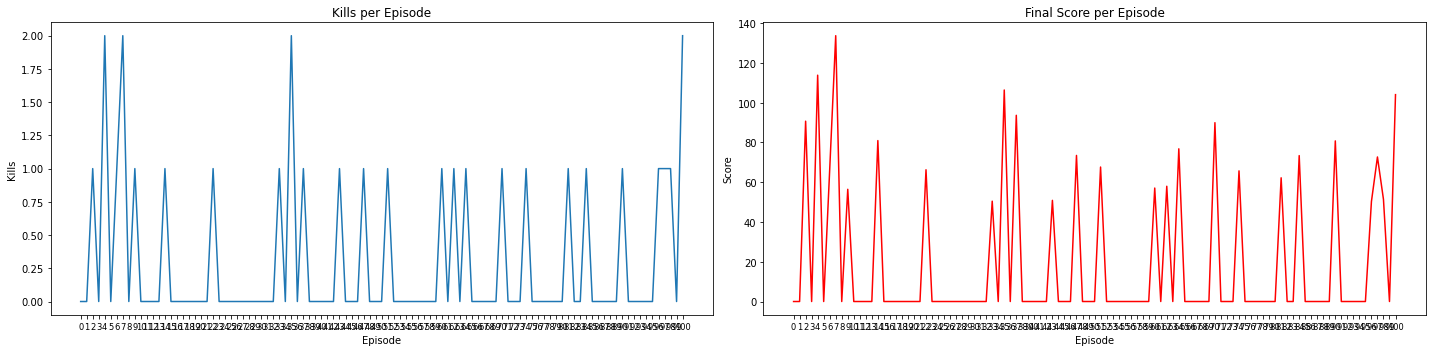

In [3]:
plt.subplot(1, 2, 1)
plt.title("Kills per Episode")
plt.xticks(range(len(data.index)), data.index, size='small')
plt.ylabel('Kills')
plt.xlabel('Episode')
plt.plot(data.index, data['kills'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.xticks(range(len(data.index)), data.index, size='small')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

plt.tight_layout()
plt.show()

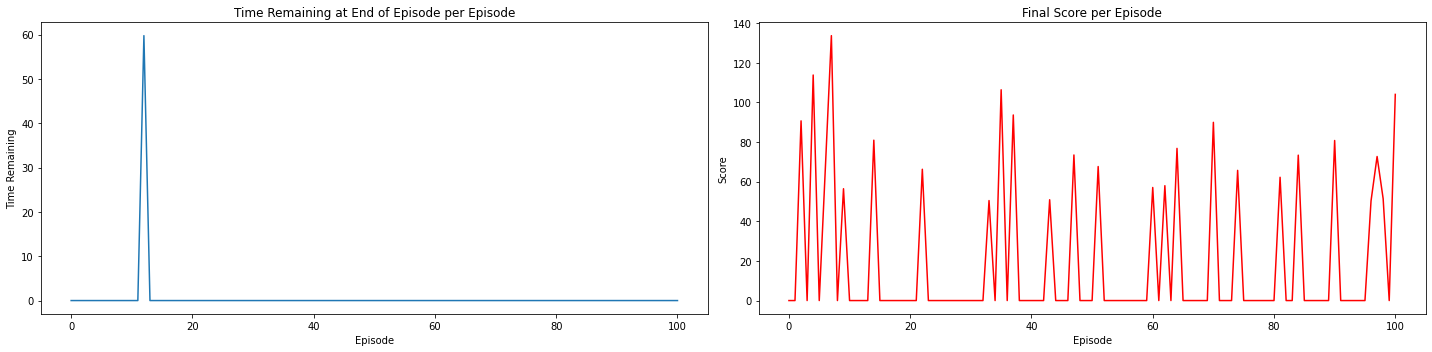

In [4]:
plt.subplot(1, 2, 1)
plt.title("Time Remaining at End of Episode per Episode")
plt.ylabel('Time Remaining')
plt.xlabel('Episode')
plt.plot(data.index, data['time'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

plt.tight_layout()
plt.show()

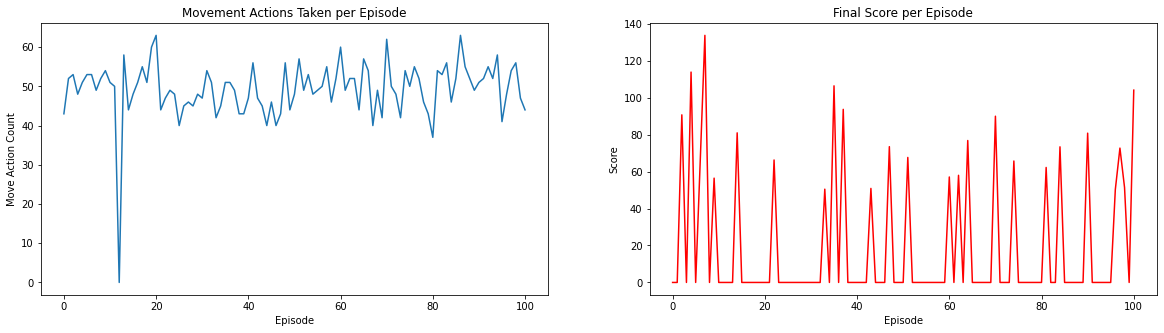

In [5]:
plt.subplot(1, 2, 1)
plt.title("Movement Actions Taken per Episode")
plt.ylabel('Move Action Count')
plt.xlabel('Episode')
plt.plot(data.index, data['movement'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

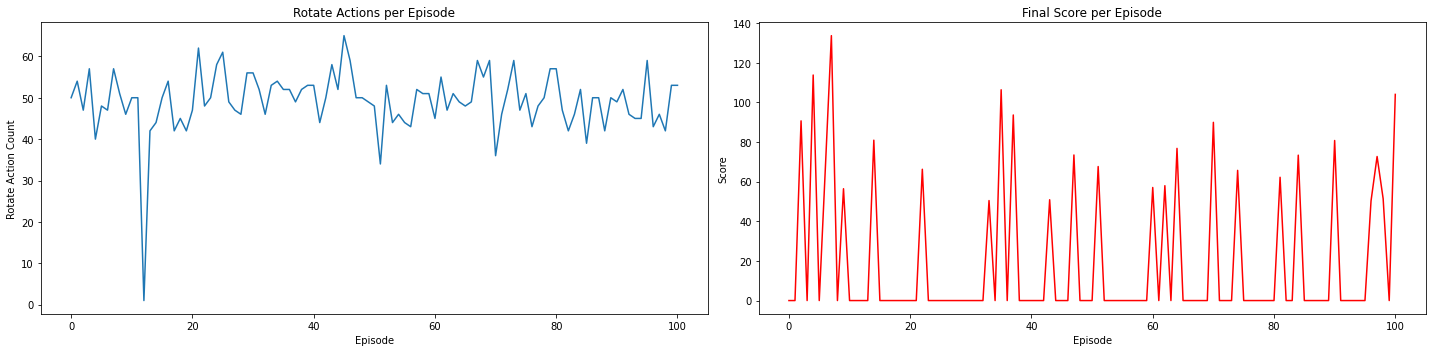

In [6]:
plt.subplot(1, 2, 1)
plt.title("Rotate Actions per Episode")
plt.ylabel('Rotate Action Count')
plt.xlabel('Episode')
plt.plot(data.index, data['rotate'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

plt.tight_layout()
plt.show()

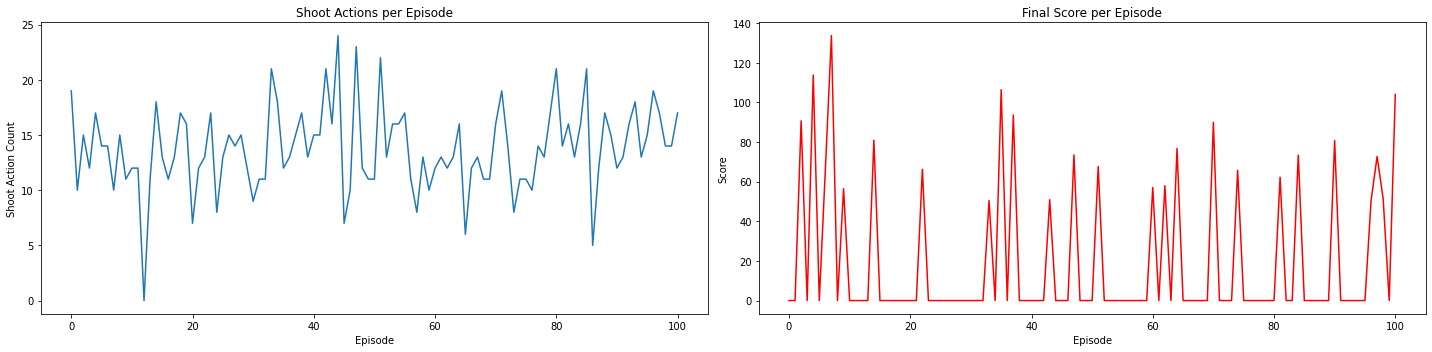

In [7]:
plt.subplot(1, 2, 1)
plt.title("Shoot Actions per Episode")
plt.ylabel('Shoot Action Count')
plt.xlabel('Episode')
plt.plot(data.index, data['shoot'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

plt.tight_layout()
plt.show()

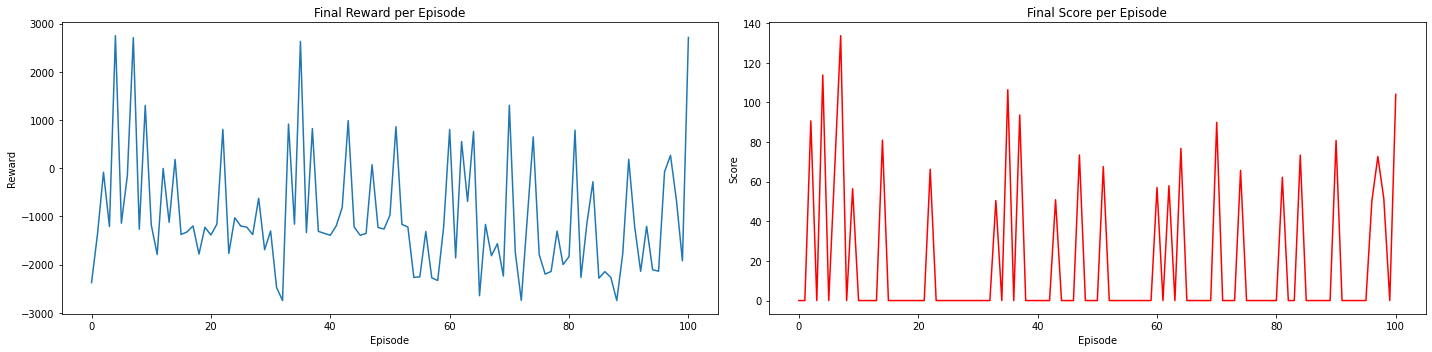

In [8]:
plt.subplot(1, 2, 1)
plt.title("Final Reward per Episode")
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.plot(data.index, data['reward'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

plt.tight_layout()
plt.show()

# Positive Score Plots
There are many episodes where no score is achieved. To better analyze the results we will isolate episodes where a score was gained and then graph it against score. This will allow us to isolate any actions that may potentially be leading to higher scores.

In [9]:
df_score = data.loc[data['score'] > 0].sort_values('score').reset_index(drop=True)
df_score.head()

,kills,time,health,score,movement,rotate,shoot,reward
0,1,0.0,100,50.279339,48,43,19,-75
1,1,0.0,100,50.472054,42,53,21,916
2,1,0.0,100,50.885513,45,58,16,989
3,1,0.0,100,51.380718,56,42,14,-671
4,1,0.0,100,56.445957,54,46,11,1304


In [10]:
df_score.describe()

,kills,time,health,score,movement,rotate,shoot,reward
count,25.000000,25.0,25.0,25.000000,25.00000,25.000000,25.000000,25.000000
mean,1.160000,0.0,100.0,75.731372,50.52000,47.240000,15.320000,832.800000
std,0.374166,0.0,0.0,21.830267,5.35506,5.621981,3.460732,966.922265
min,1.000000,0.0,100.0,50.279339,42.00000,34.000000,10.000000,-671.000000
25%,1.000000,0.0,100.0,57.979305,46.00000,45.000000,12.000000,183.000000
50%,1.000000,0.0,100.0,72.708939,51.00000,47.000000,15.000000,789.000000
75%,1.000000,0.0,100.0,89.960419,54.00000,50.000000,17.000000,989.000000
max,2.000000,0.0,100.0,133.720581,62.00000,58.000000,23.000000,2751.000000


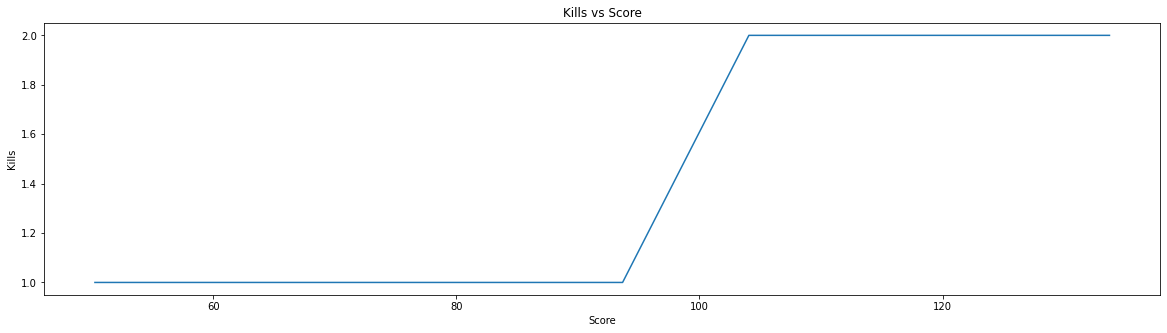

In [11]:
plt.title("Kills vs Score")
plt.ylabel('Kills')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['kills'])

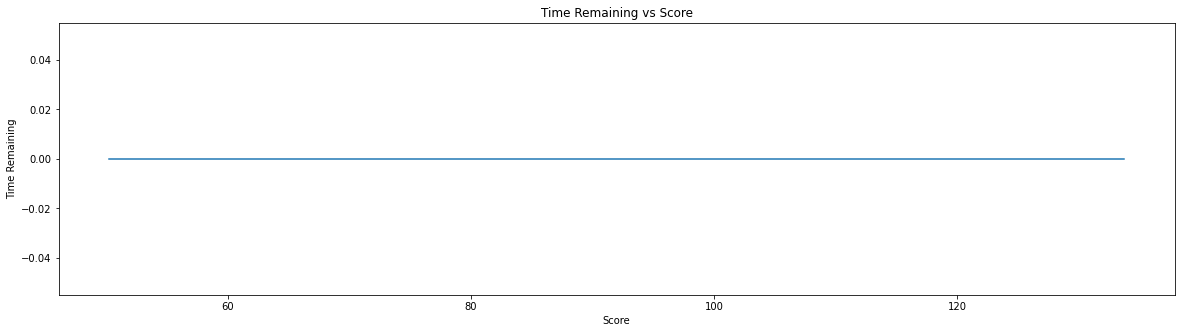

In [12]:
plt.title("Time Remaining vs Score")
plt.ylabel('Time Remaining')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['time'])

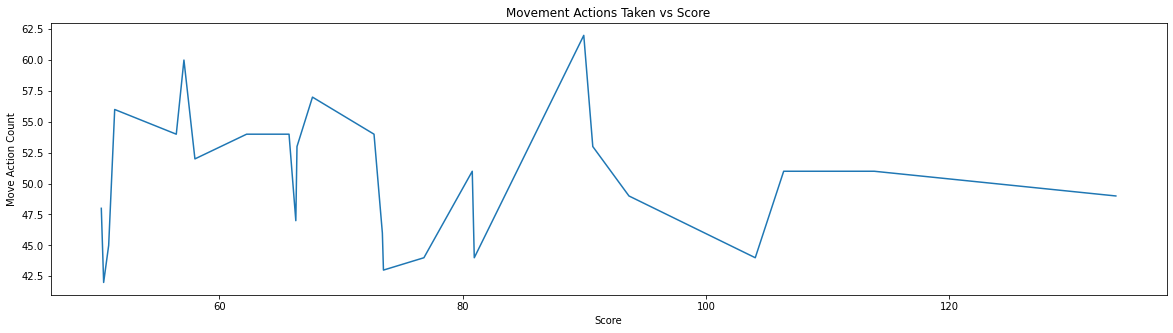

In [13]:
plt.title("Movement Actions Taken vs Score")
plt.ylabel('Move Action Count')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['movement'])

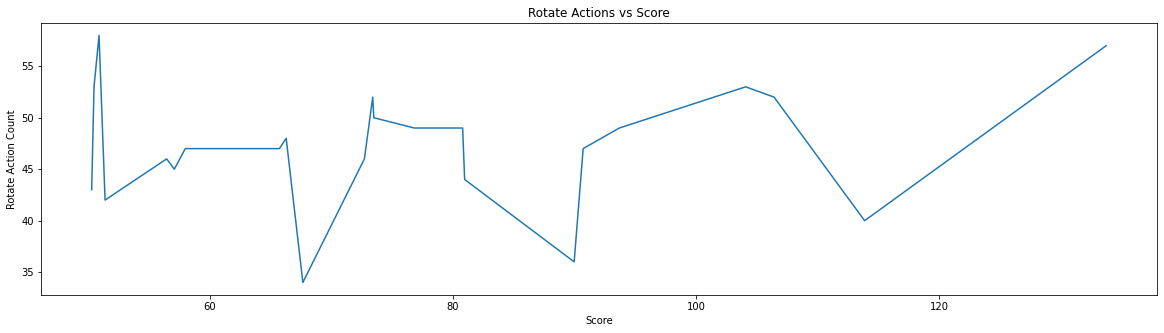

In [14]:
plt.title("Rotate Actions vs Score")
plt.ylabel('Rotate Action Count')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['rotate'])

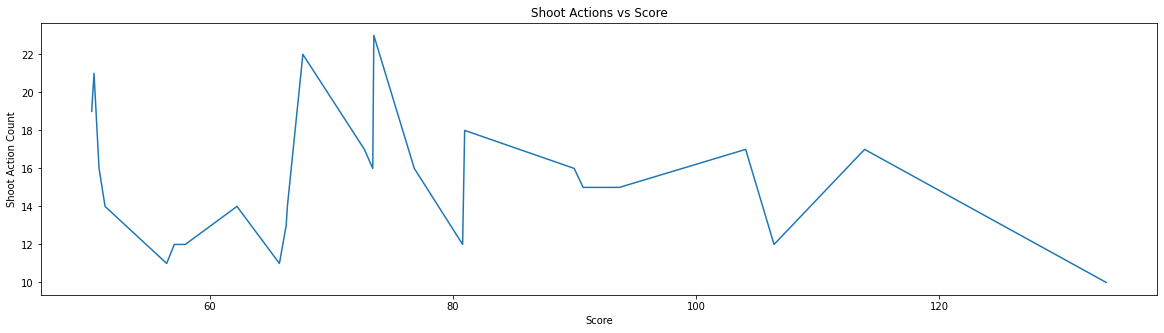

In [15]:
plt.title("Shoot Actions vs Score")
plt.ylabel('Shoot Action Count')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['shoot'])

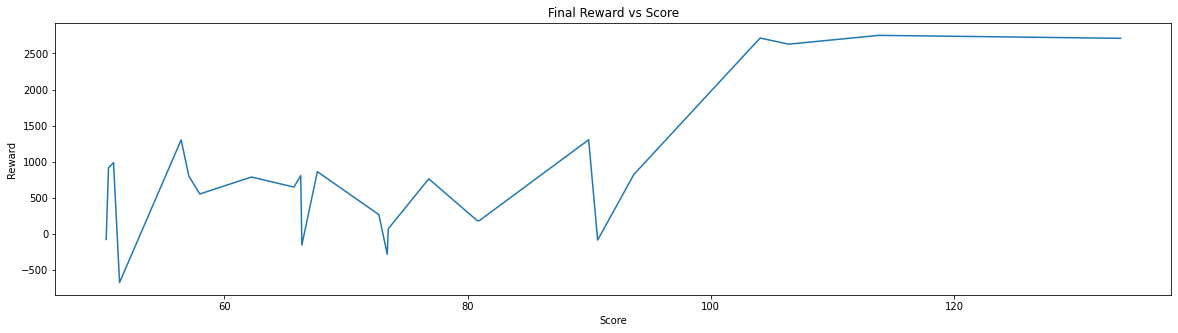

In [16]:
plt.title("Final Reward vs Score")
plt.ylabel('Reward')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['reward'])